In [1]:
import io
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
place = pd.read_csv('Placement_Data_Full_Class.csv')

In [5]:
place.shape,place.info(),place.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


((215, 15),
 None,
             sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
 count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
 mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
 std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
 min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
 25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
 50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
 75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
 max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   
 
               salary  
 count     148.000000  
 mean   288655.405405  
 std     93457.452420  
 min    200000.000000  
 25%    240000.000000  
 50%    265000.000000  
 75%    300000.000000  
 max    940000.000000  )

In [6]:
place.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
place.drop(['salary'],axis=1,inplace=True)

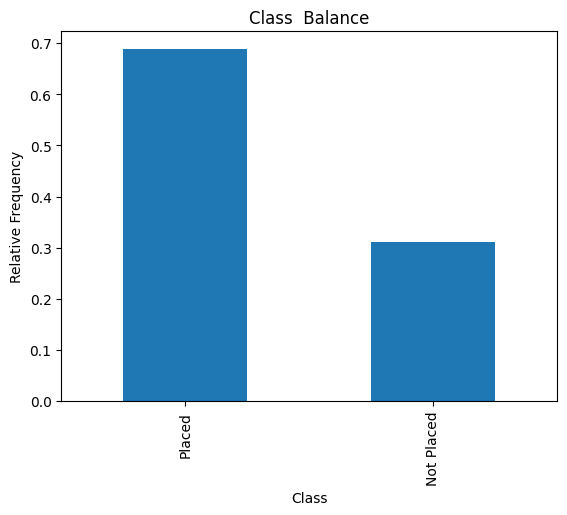

In [9]:
place["status"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class  Balance"
);

In [10]:
corr = place.select_dtypes('number').corr()

<Axes: >

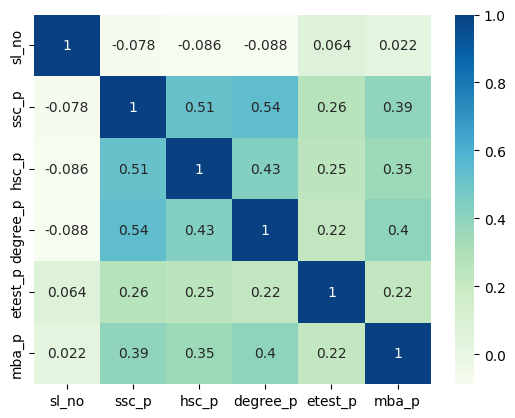

In [13]:
sns.heatmap(corr,vmax=1,annot=True,cmap='GnBu')

Checking Cardinality of ds

In [14]:
place.select_dtypes('object').nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

In [17]:
place.drop(['sl_no'],axis=1,inplace=True)

In [21]:
cols = list(place.select_dtypes('object').columns)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in cols:
    place[i] = label.fit_transform(place[i])


In [22]:
place

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [23]:
x = place.drop(columns=['status'],axis=1)
y = place['status']

In [24]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


In [25]:
x = scalar.fit_transform(x)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42
    )

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [28]:
prediction = model.predict(X_test)

In [30]:
X_test.shape,prediction.shape,y_train.shape

((43, 12), (43,), (172,))

In [31]:
accuracy_score(y_test,prediction)

0.8837209302325582

In [32]:
features = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p'
           ,'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']
# Get importances
importances = model.coef_[0]
# Put importances into a Series
odds_ratios = pd.Series(np.exp(importances), index= features).sort_values()
# Review 
odds_ratios.head()

mba_p             0.406590
degree_t          0.706021
specialisation    0.850301
hsc_b             0.876864
etest_p           0.877831
dtype: float64

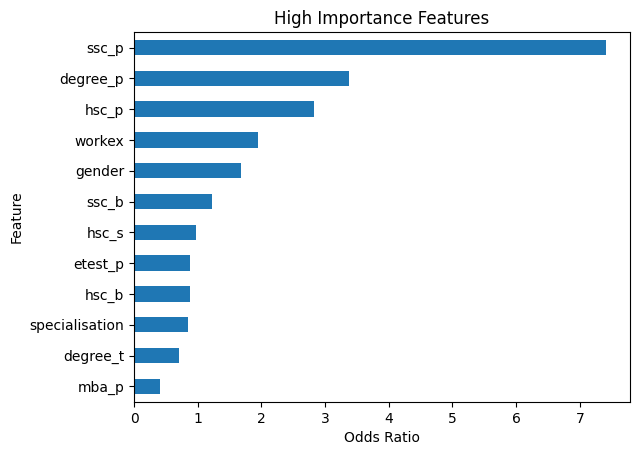

In [33]:
odds_ratios.plot(kind="barh")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("High Importance Features");